In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Los objetivos de hoy son:

EJERCICIO 1 : Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
- Percentiles 25, 75
- Rango Intercualtílico
- Boxplot de algunas variables
- Tabla de frecuencias
     Variables cualitativas
    - Variables cuantitativas
    - Frecuencia acumulada
    - Representación de al menos una tabla de frecuencias

In [85]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [87]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [88]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [89]:
lista=['age', 'bmi', 'children', 'charges']
for i in lista:
    q3, q1 = np.percentile(df[i], [75, 25])
    riq = q3 - q1
    print(f"El rango intercuartílico de {i} es:", riq)

El rango intercuartílico de age es: 24.0
El rango intercuartílico de bmi es: 8.3975
El rango intercuartílico de children es: 2.0
El rango intercuartílico de charges es: 11899.625365


In [90]:
#- Boxplot de algunas variables
edad=df.groupby("sex")["smoker"].count()



In [91]:
edad

sex
female    662
male      676
Name: smoker, dtype: int64

In [92]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

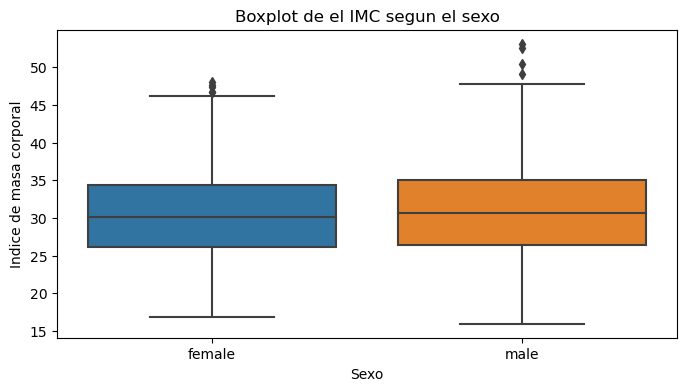

In [93]:

plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'sex', y ='bmi', data = df)
fig.set(xlabel='Sexo', ylabel= 'Indice de masa corporal')
fig.set_title('Boxplot de el IMC segun el sexo')
plt.show() 

Text(0.5, 1.0, 'Boxplot de los costes médicos según si el afiliado es fumador o no')

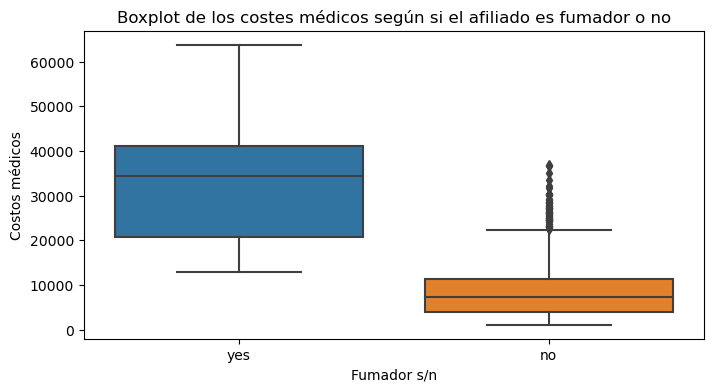

In [94]:
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'smoker', y ='charges', data = df)
fig.set(xlabel='Fumador s/n', ylabel= 'Costos médicos')
fig.set_title('Boxplot de los costes médicos según si el afiliado es fumador o no')

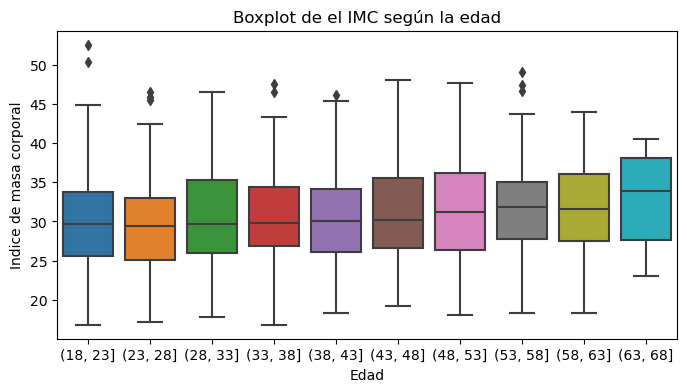

In [95]:
bins = np.arange(18, 64+5, 5)
df["age_group"] = pd.cut(df["age"], bins=bins)
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'age_group', y ='bmi', data = df)
fig.set(xlabel='Edad', ylabel= 'Indice de masa corporal')
fig.set_title('Boxplot de el IMC según la edad')
plt.show() 

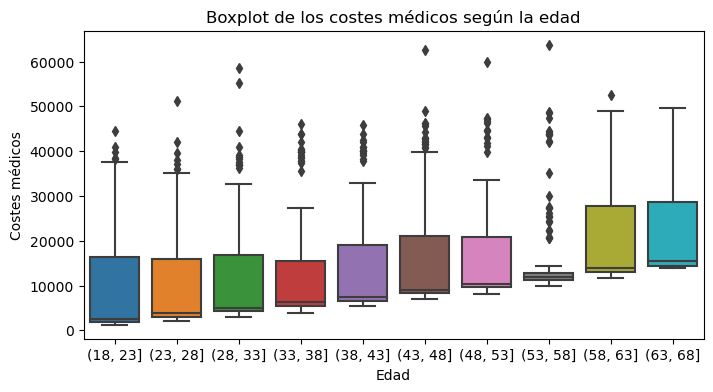

In [96]:
bins = np.arange(18, 64+5, 5)
df["age_group"] = pd.cut(df["age"], bins=bins)
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'age_group', y ='charges', data = df)
fig.set(xlabel='Edad', ylabel= 'Costes médicos')
fig.set_title('Boxplot de los costes médicos según la edad')
plt.show() 

Tabla de frecuencias
- Variables cualitativas
- Variables cuantitativas
- Frecuencia acumulada
- Representación de al menos una tabla de frecuencias

In [97]:
columnas_quali= [ 'sex', 'smoker', 'region']
columnas_quanti= ['age','bmi','children', 'charges']

In [98]:
#FREQUENCIA CUALITATIVA
for i in columnas_quali:
    df_quali = df.groupby(i)
    frecuencias_quali = df_quali.agg(frecuencia=(i, "count"))
    print(f"la frecuencia de {i} es {frecuencias_quali}")

la frecuencia de sex es         frecuencia
sex               
female         662
male           676
la frecuencia de smoker es         frecuencia
smoker            
no            1064
yes            274
la frecuencia de region es            frecuencia
region               
northeast         324
northwest         325
southeast         364
southwest         325


In [99]:
# FREQUENCIA CUANTITATIVA

for i in columnas_quanti:
    df["group"] = pd.cut(df[i], bins=5)
    df_age = df.groupby("group")
    df_age_lengths =  df_age.agg(frecuencia=(i, "count"))
    print(f"la frecuencia para {i} es: {df_age_lengths}")


la frecuencia para age es:                 frecuencia
group                     
(17.954, 27.2]         362
(27.2, 36.4]           237
(36.4, 45.6]           239
(45.6, 54.8]           258
(54.8, 64.0]           242
la frecuencia para bmi es:                   frecuencia
group                       
(15.923, 23.394]         157
(23.394, 30.828]         553
(30.828, 38.262]         483
(38.262, 45.696]         128
(45.696, 53.13]           17
la frecuencia para children es:                frecuencia
group                    
(-0.005, 1.0]         898
(1.0, 2.0]            240
(2.0, 3.0]            157
(3.0, 4.0]             25
(4.0, 5.0]             18
la frecuencia para charges es:                         frecuencia
group                             
(1059.225, 13651.585]          934
(13651.585, 26181.296]         215
(26181.296, 38711.006]          94
(38711.006, 51240.717]          89
(51240.717, 63770.428]           6


In [100]:
# FRECUENCIA ACUMULADA
bins = np.arange(18, 64+5, 5)

df["age_group"] = pd.cut(df["age"], bins=bins)
df_age = df.groupby("age_group")
df_age_lengths =  df_age.agg(frecuencia=("age", "count"))

df_age_lengths["frecuencia_acumulada"] = df_age_lengths["frecuencia"].cumsum()

df_age_lengths

,frecuencia,frecuencia_acumulada
age_group,,
"(18, 23]",181,181
"(23, 28]",140,321
"(28, 33]",133,454
"(33, 38]",126,580
"(38, 43]",133,713
"(43, 48]",143,856
"(48, 53]",143,999
"(53, 58]",131,1130
"(58, 63]",117,1247


In [101]:
bins = np.arange(15.96, 53.13+10, 10)

df["bmi_group"] = pd.cut(df["bmi"], bins=bins)
df_bmi = df.groupby("bmi_group")
df_bmi_lengths =  df_bmi.agg(frecuencia=("bmi", "count"))

df_bmi_lengths["frecuencia_acumulada"] = df_bmi_lengths["frecuencia"].cumsum()

df_bmi_lengths

,frecuencia,frecuencia_acumulada
bmi_group,,
"(15.96, 25.96]",316,316
"(25.96, 35.96]",758,1074
"(35.96, 45.96]",247,1321
"(45.96, 55.96]",16,1337


In [102]:
bins = np.arange(0, 5+1,1)

df["children_group"] = pd.cut(df["children"], bins=bins)
df_children = df.groupby("children_group")
df_children_lengths =  df_children.agg(frecuencia=("children", "count"))

df_children_lengths["frecuencia_acumulada"] = df_children_lengths["frecuencia"].cumsum()

df_children_lengths

,frecuencia,frecuencia_acumulada
children_group,,
"(0, 1]",324,324
"(1, 2]",240,564
"(2, 3]",157,721
"(3, 4]",25,746
"(4, 5]",18,764


In [103]:
bins = np.arange(1121.87, 63770.4+10000,10000)

df["charges_group"] = pd.cut(df["charges"], bins=bins)
df_charges = df.groupby("charges_group")
df_charges_lengths =  df_charges.agg(frecuencia=("charges", "count"))

df_charges_lengths["frecuencia_acumulada"] = df_charges_lengths["frecuencia"].cumsum()

df_charges_lengths

,frecuencia,frecuencia_acumulada
charges_group,,
"(1121.87, 11121.87]",781,781
"(11121.87, 21121.87]",302,1083
"(21121.87, 31121.87]",99,1182
"(31121.87, 41121.87]",89,1271
"(41121.87, 51121.87]",60,1331
"(51121.87, 61121.87]",5,1336
"(61121.87, 71121.87]",2,1338


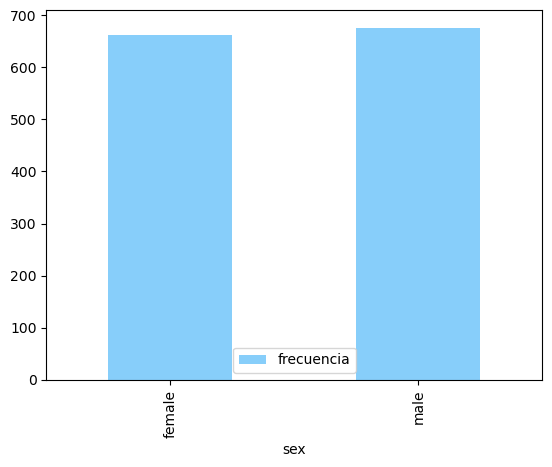

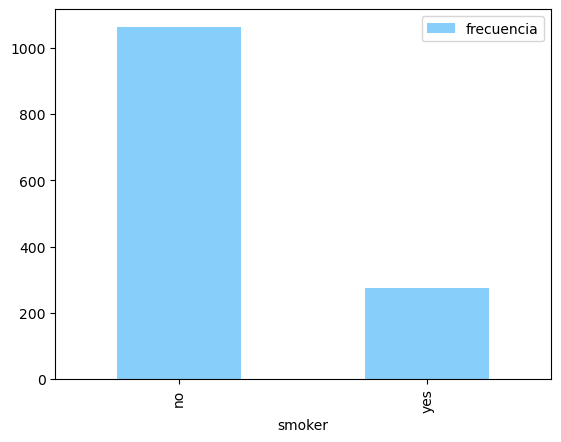

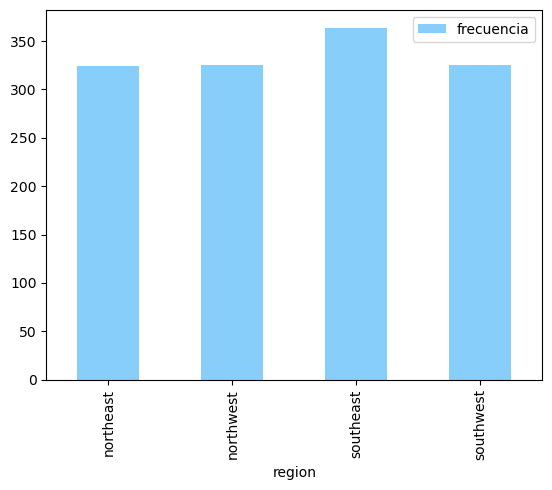

In [104]:
plt.rcdefaults()

for i in columnas_quali:
    df_quali1 = df.groupby(i)
    frecuencias_quali1 = df_quali1.agg(frecuencia=(i, "count")) 
    frecuencias_quali1.plot.bar(color='lightskyblue')

Text(0, 0.5, 'Frecuencias')

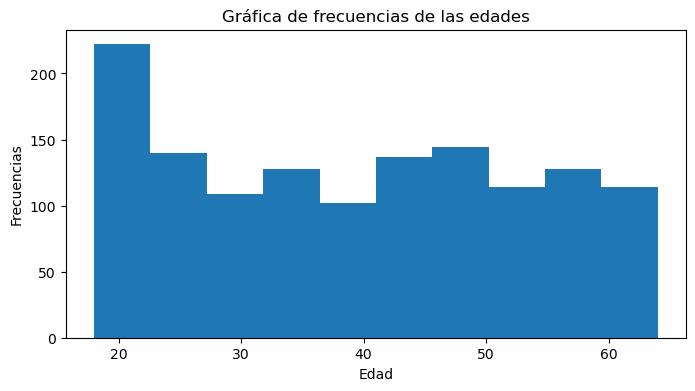

In [115]:
fig,ax = plt.subplots(figsize= (8,4))
df_edad = df['age']
df_edad.plot.hist()
plt.title('Gráfica de frecuencias de las edades')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencias')


Text(0, 0.5, 'Frecuencias')

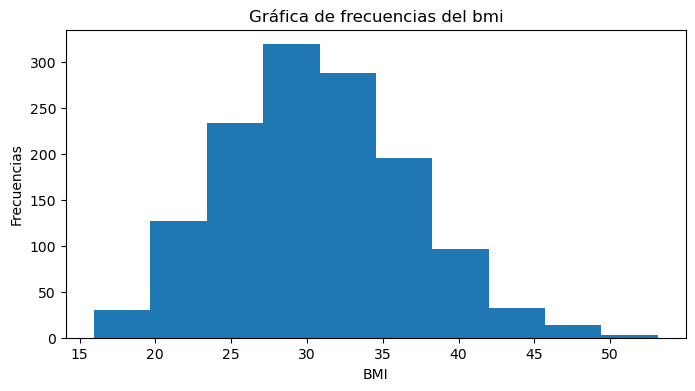

In [116]:
fig,ax = plt.subplots(figsize= (8,4))
df_bmi = df['bmi']
df_bmi.plot.hist()
plt.title('Gráfica de frecuencias del bmi')
ax.set_xlabel('BMI')
ax.set_ylabel('Frecuencias')

Text(0, 0.5, 'Frecuencias')

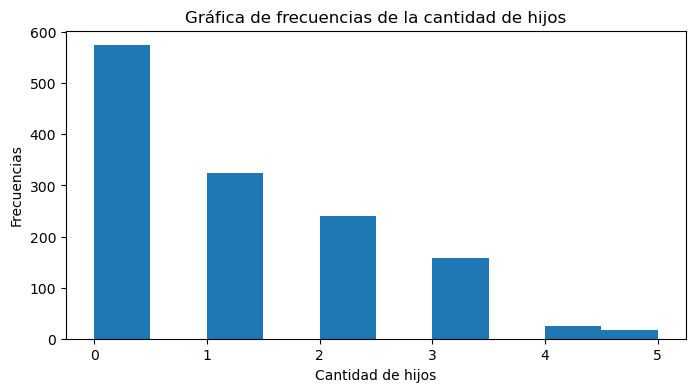

In [117]:
fig,ax = plt.subplots(figsize= (8,4))
df_children = df['children']
df_children.plot.hist()
plt.title('Gráfica de frecuencias de la cantidad de hijos')
ax.set_xlabel('Cantidad de hijos')
ax.set_ylabel('Frecuencias')

Text(0, 0.5, 'Frecuencias')

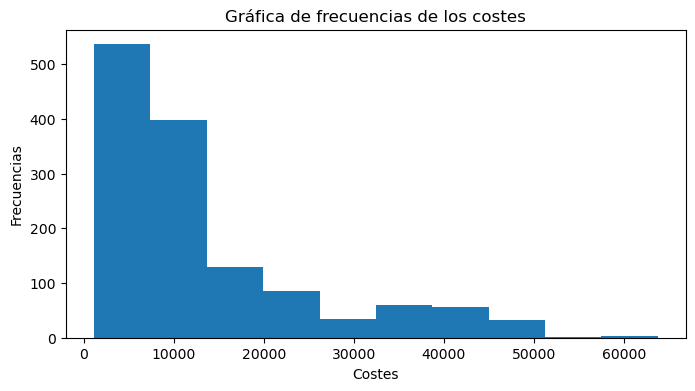

In [118]:
fig,ax = plt.subplots(figsize= (8,4))
df_charges = df['charges']
df_charges.plot.hist()
plt.title('Gráfica de frecuencias de los costes')
ax.set_xlabel('Costes')
ax.set_ylabel('Frecuencias')

EJERCICIO 2: Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Los boxplots nos dejan una imagen clara de la variabilidad en nuestros datos según las categorías. 
Por ejemplo: en el boxplot de costes médicos según si es fumador o no, podemos ver claramente que los costes para fumadores serían más altos que los costes para los no fumadores. 
En cambio, en el boxplot de IMC según edad, no se observa ninguna tendencia ni mucha variación entre los diferentes grupos de edades con respecto al IMC. 
En el boxplot de costes médicos según edad, se puede observar un aumento conforme aumenta la edad del cliente. 

Con respecto a las tablas de frecuencias y los gráficos correspondientes:

Observamos que hay una mayor cantidad de clientes NO fumadores que de clientes fumadores.
La cantidad de clientes por zona es distribuida homogeneamente (tenemos aproximadamente la misma cantidad de clientes por zona).

Con respecto a las edades, tenemos un pico en la primera categoría de edades, con una gran cantidad de clientes de entre 18 y 23 años. 
El IMC presenta una distribución normal sorprendente. 
Como se puede observar en los gráficos tanto la cantidad de hijos como los costes tienen un sesgo positivo (sesgada hacia la derecha). 